In [2]:
## Figure 14 - Map view of displacement time-series on Fernandina with Sentinel-1 data

import os
import numpy as np
from matplotlib import pyplot as plt, gridspec, ticker
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pysar.simulation.plot import *
from pysar.utils import ptime, readfile, writefile, utils as ut, network as pnet, plot as pp
from pysar.objects import timeseries, sensor
from pysar import view


work_dir = '~/insarlab/Galapagos/GalapagosSenDT128/PYSAR/GEOCODE'
work_dir = os.path.expanduser(work_dir)
os.chdir(work_dir)
print('Go to directory: '+work_dir)

ts_file = 'geo_timeseries_ECMWF_demErr_refDate_ramp.h5'
vel_file = 'geo_velocity.h5'
dem_file = 'dem.h5'
mask_file = 'maskTempCohFernandina.h5'

geo_box = (-91.670, -0.255, -91.370, -0.515)    # W, N, E, S
proj_name = 'FernandinaSenDT128'

atr = readfile.read_attribute(ts_file)
coord = ut.coordinate(atr)
pix_box = coord.box_geo2pixel(geo_box)

## Option 1 - call view.py to plot
cmd = 'view.py {} -m {} '.format(ts_file, mask_file)
cmd += ' --sub-lon {w} {e} --sub-lat {s} {n} '.format(w=geo_box[0], n=geo_box[1],
                                                      e=geo_box[2], s=geo_box[3])
cmd += ' --wrap --wrap-range -10 10 '
cmd += ' --ncols 10 --nrows 10 --figsize 8 9 --fontsize 8 --notick --nocbar --dpi 600 --no-tight-layout '
cmd += ' --noaxis  --nodisplay  -o {}_TS.png'.format(proj_name)
print(cmd)
#os.system(cmd)
print('Done.')

Go to directory: /Users/yunjunz/insarlab/Galapagos/GalapagosSenDT128/PYSAR/GEOCODE
view.py geo_timeseries_ECMWF_demErr_refDate_ramp.h5 -m maskTempCohFernandina.h5  --sub-lon -91.67 -91.37 --sub-lat -0.515 -0.255  --wrap --wrap-range -10 10  --ncols 10 --nrows 10 --figsize 8 9 --fontsize 8 --notick --nocbar --dpi 600 --no-tight-layout  --noaxis  --nodisplay  -o FernandinaSenDT128_TS.png
Done.


/Users/yunjunz/development/python/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


<Figure size 576x216 with 0 Axes>

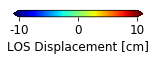

In [8]:
# Figure 14 Colorbar
fig = plt.figure(figsize=(2, 0.1))
ax = fig.add_axes([0.05, 0.05, 0.9, 0.9])
cbar = mpl.colorbar.ColorbarBase(ax, cmap='jet', orientation='horizontal', ticks=[0, 0.5, 1], extend='both')
cbar.ax.set_xticklabels(['-10', '0', '10'])
cbar.ax.tick_params(which='both', direction='out', labelsize=font_size)
cbar.set_label('LOS Displacement [cm]', fontsize=font_size)

plt.savefig('{}_TS_cbar.png'.format(proj_name), bbox_inches='tight', transparent=True, dpi=fig_dpi)
plt.show()

y/x: 878/414
reading timeseries data from file: geo_timeseries_ECMWF_demErr_refDate_ramp.h5 ...


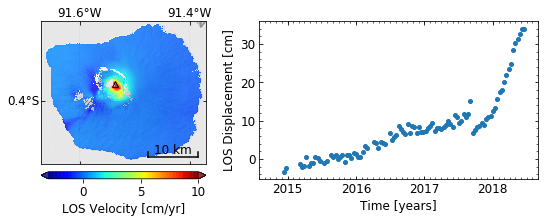

In [7]:
# test - Plot Velocity with POI displacement timeseries
print_msg = False

# read ts data
lat, lon = -0.3680, -91.5355
y, x = coord.geo2radar(lat, lon)[0:2]
print('y/x: {}/{}'.format(y, x))
d_ts = np.squeeze(readfile.read(ts_file, box=(x, y, x+1, y+1))[0]) * 100.
obj = timeseries(ts_file)
obj.open(print_msg=print_msg)
dates = ptime.date_list2vector(obj.dateList)[0]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[8, 3])

# read vel data
cmd = 'view.py {} velocity --mask {} '.format(vel_file, mask_file)
cmd += '--sub-lon {w} {e} --sub-lat {s} {n} '.format(w=geo_box[0], n=geo_box[1], e=geo_box[2], s=geo_box[3])
cmd += '-c jet -v -3 10 --cbar-loc bottom --cbar-nbins 3 --cbar-ext both --cbar-size 5% '
cmd += '--dem {} --dem-nocontour '.format(dem_file)
cmd += '--lalo-step 0.2 --lalo-loc 1 0 1 0 --scalebar 0.3 0.80 0.05 --notitle --fontsize 12 '
d_v, atr ,inps = view.prep_slice(cmd, print_msg=print_msg)
ax[0], inps, im, cbar = view.plot_slice(ax[0], d_v, atr, inps, print_msg=print_msg)

ax[0].plot(lon, lat, "k^", mfc='none', mew=1., ms=6)  #point of interest
cbar.set_label("LOS Velocity [cm/yr]", fontsize=font_size)


ax[1].scatter(dates, d_ts, marker='o', s=4**2) #, color='k')
pp.auto_adjust_xaxis_date(ax[1], obj.yearList, fontsize=font_size)
ax[1].set_xlabel('Time [years]', fontsize=font_size)
ax[1].set_ylabel('LOS Displacement [cm]', fontsize=font_size)
ax[1].yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax[1].tick_params(which='both', direction='in', labelsize=font_size,
                  bottom=True, top=True, left=True, right=True)

fig.subplots_adjust(wspace=-0.4)
fig.tight_layout()
#plt.savefig('{}_POI.png'.format(proj_name), bbox_inches='tight', transparent=True, dpi=fig_dpi)
plt.show()